# Rushikesh Kulkarni

## Task1 : Prediction Using Supervised ML

### Predicting the score of a student based on the hours studied

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
##Checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
##Separating the independent and dependent variables
x = df.drop(columns='Scores')

In [8]:
y = df['Scores']

In [9]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [10]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [62]:
## Implementing Train Test Split of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:
X_train

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3
8,8.3
6,9.2


In [63]:
X_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [64]:
Y_train

22    35
17    24
24    86
23    76
14    17
1     47
10    85
13    42
8     81
6     88
18    67
4     30
9     25
7     60
20    30
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
## We have split our data into training and testing sets, and now is finally the time to train our algorithm.
reg = LinearRegression()
reg.fit(X_train,Y_train)
reg

LinearRegression()

In [68]:
##Predicting the values
y_pred = reg.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [69]:
## Calculating the slope and y-intercept
print(reg.intercept_)
print(reg.coef_)

2.018160041434683
[9.91065648]


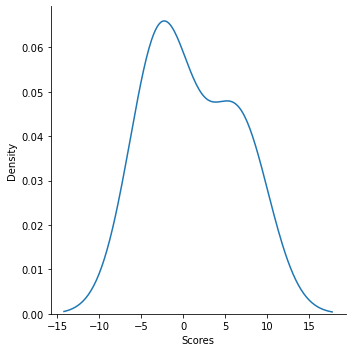

In [70]:
sns.displot(y_pred-Y_test,kind='kde')

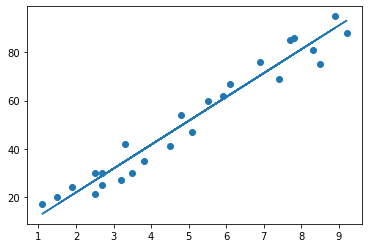

In [71]:
##Plotting the best fit line
line = reg.coef_*x+reg.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [72]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [73]:
# You can also test with your own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = reg.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [74]:
## Calculating the R squared value
from sklearn import metrics
from sklearn.metrics import r2_score
score = r2_score(y_pred,Y_test)
print('R Squared value: ',score)

R Squared value:  0.9546785947197246
